## Advanced Lab Topic 1

### Filtering

In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


def sinusoid(A, f0, phi0, t):
    return A*np.sin(2*np.pi*f0*t + phi0)


nsample = 2048
sampling_frequency = 1024

# generating summed sinusoid signal
t = np.arange(0, nsample/sampling_frequency, 1/sampling_frequency)
sig = sum(
    [sinusoid(A, f0, phi0, t) for A, f0, phi0 in [
          (10, 100, 0),
          (5, 200, np.pi/6),
          (2.5, 300, np.pi/4)
    ]])


In [ ]:
order = 30
lowpass_filter = signal.firwin(order+1, cutoff=150, pass_zero='lowpass', fs=sampling_frequency)
sig_lowpass = signal.lfilter(lowpass_filter, 1, sig)

Text(0, 0.5, 's')

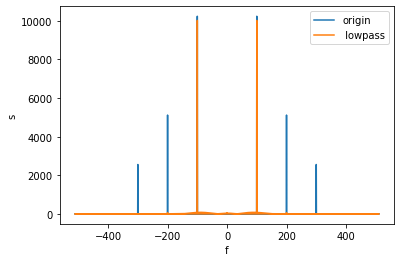

In [9]:
from scipy import fft

for s, label in zip([sig, sig_lowpass], ['origin',' lowpass']):
    freq = fft.fftfreq(len(s), d=1/sampling_frequency)
    s_fft = fft.fft(s)
    plt.plot(freq, np.abs(s_fft), label=label)
plt.legend()
plt.xlabel('f')
plt.ylabel('s')